Classification Trees in Python from Start to Finish
https://www.youtube.com/watch?v=q90UDEgYqeI&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=52

In [56]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [8]:
#Imports data and prints head, data is processed heart desease data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [20]:
#names columes
df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'examg',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,examg,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [30]:
#deal with missing data - identify data type
print(df.dtypes)
print(len(df))

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
examg      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object
303


In [23]:
#investigate data
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [26]:
#checks for missing values in either ca or thal columns
len(df.loc[(df['ca'] =='?')
            |
            (df['thal'] == '?')])

6

In [29]:
#prints data missing
(df.loc[(df['ca'] =='?')
            |
            (df['thal'] == '?')])

,age,sex,cp,restbp,chol,fbs,restecg,thalach,examg,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [32]:
#removes missiing values
df_no_missing = (df.loc[(df['ca'] !='?')
            &
            (df['thal'] != '?')])
len(df_no_missing)

297

In [36]:
#makes sure ? is missing from thal 
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [38]:
#Spliting data to make predictions
X = df_no_missing.drop('hd',axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,examg,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [39]:
#Spliting for varriable we will want to pridict(hd=heart disease)
Y = df_no_missing['hd'].copy()
Y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [41]:
#need to convert catagorical data into numberical values exmaple
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,examg,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [51]:
#need to convert catagorical data into numberical values
X_encoded = pd.get_dummies(X, columns=['cp',
                                        'restecg',
                                        'slope',
                                        'thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,examg,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [45]:
Y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

#replaces the 1,2,3,4 values with 1
y_not_zero_index = Y >0
Y[y_not_zero_index] = 1
Y.unique()

In [54]:
#building a classification treee
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, random_state=42)

#creates decision tree and fits data
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, Y_train)

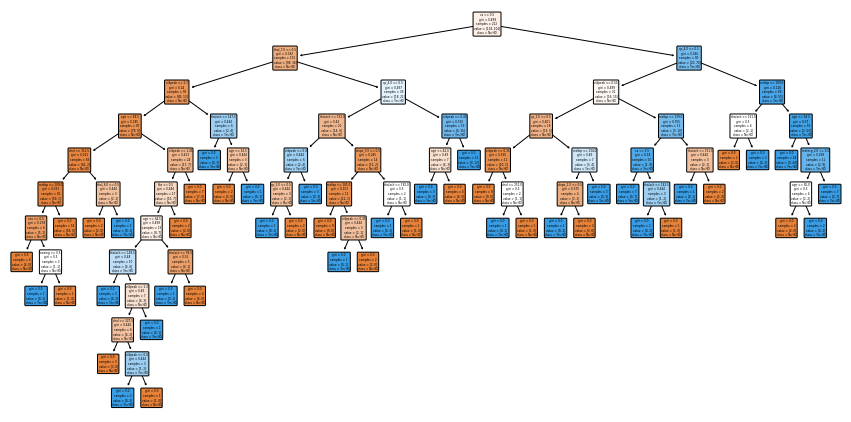

In [58]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns);
          

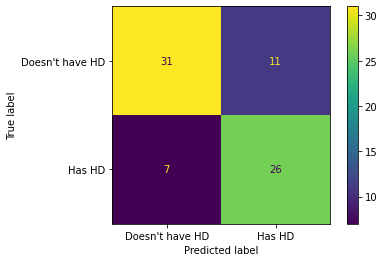

In [59]:
#creates confustion matrix
plot_confusion_matrix(clf_dt, X_test, Y_test, display_labels=["Doesn't have HD", "Has HD"])

In [60]:
#results of matrix:
    #31 or 74% of people w/o HD were correctly classified
    #33 or 79% of people w/ HD were correctly classified

In [79]:
#cost complexity pruning
path = clf_dt.cost_complexity_pruning_path(X_train,Y_train)
ccp_alphas=path.ccp_alphas
ccp_alphas=ccp_alphas[:-1]
clf_dts=[]

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train,Y_train)
    clf_dts.append(clf_dt)

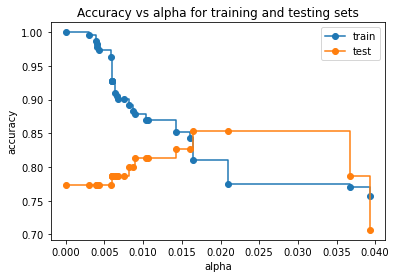

In [83]:
train_scores = [clf_dt.score(X_train,Y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test,Y_test) for clf_dt in clf_dts]

fig, ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [84]:
#can guess a good alpha value is 0.016, as this is were the accuracy of training set drops off

<AxesSubplot:xlabel='tree'>

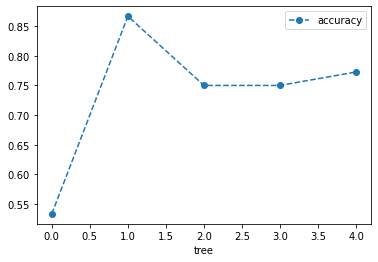

In [88]:
#use cross validation, shows 0.016 does produce bed value
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)
scores = cross_val_score(clf_dt, X_train, Y_train, cv=5)
df=pd.DataFrame(data={'tree':range(5), 'accuracy': scores})
                 
df.plot(x="tree", y="accuracy", marker="o", linestyle="--")


<AxesSubplot:xlabel='alpha'>

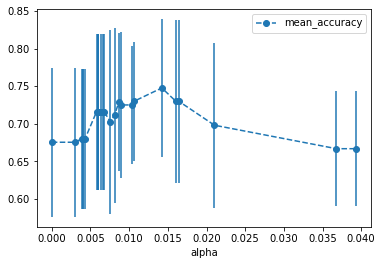

In [95]:
#you can see alpha is sensitive to training sets

#plot a gradt of accuracy
alpha_loop_values=[]

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, Y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=["alpha","mean_accuracy","std"])
alpha_results.plot(x="alpha",
                   y="mean_accuracy",
                   yerr="std",
                   marker="o",
                   linestyle='--')

In [98]:
#invesitigate if there is a better alpha than 0.016
alpha_results[(alpha_results["alpha"] > 0.014)
              &
              (alpha_results["alpha"] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [103]:
#stores ideal value 
ideal_ccp_alpha = float(alpha_results[(alpha_results["alpha"] > 0.014)
                                &
                                (alpha_results["alpha"] < 0.015)]["alpha"])
ideal_ccp_alpha
#this is ideal value for alpha for classification tree

0.014224751066856332

In [104]:
#Builds and trains a new optimized decision tree
clf_dt_pruned = DecisionTreeClassifier(random_state=42,
                                       ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, Y_train)

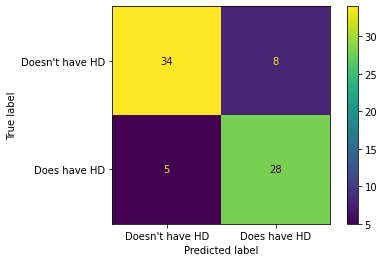

In [107]:
plot_confusion_matrix(clf_dt_pruned,
                      X_test,
                      Y_test,
                      display_labels=["Doesn't have HD", "Does have HD"])

In [ ]:
#improved results than unpruned tree!

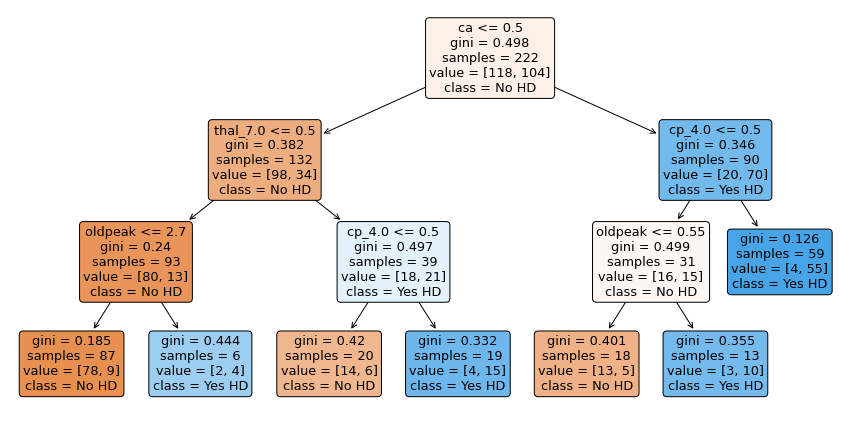

In [109]:
#draws final prune tree
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns);
#little tree is better than big tree(over fitted)